<a href="https://colab.research.google.com/github/evasseva/evasseva/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B6%80%EB%A1%9D_1%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [25]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [30]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [38]:
X = df.iloc[:, 0:8]
y = df.iloc[:,8]

In [39]:
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

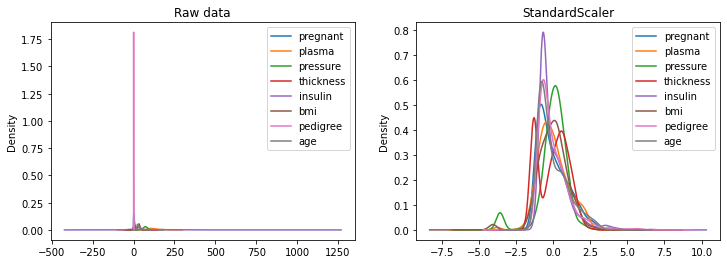

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 결정 트리

In [45]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=skf)

In [47]:
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy:67.40%
Standard Deviation: 7.05%


## 랜덤 포레스트

In [50]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv = skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 74.46%
Standard Deviation: 5.14%


## 가우시안 나이브 베이즈

In [53]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 75.16%
Standard Deviation: 5.00%


### K-최근접 이웃

In [55]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()


classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 71.01%
Standard Deviation: 4.50%


## 에이다 부스트

In [56]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 73.25%
Standard Deviation: 3.72%


## 이차 판별 분석

In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 73.94%
Standard Deviation: 4.11%


## 서포트 벡터 머신

In [58]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 75.69%
Standard Deviation: 4.38%


## 서포트 벡터 머신 - RBF 커널

In [59]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 75.00%
Standard Deviation: 5.71%


## 보팅

In [60]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 75.02%
Standard Deviation: 6.44%


## 배깅

In [63]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator = SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuray: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuray: 73.76%
Standard Deviation: 5.10%


## 여러 알고리즘 성능을 한 눈에 비교하기

In [68]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators= [('1', AdaBoostClassifier()),
                                             ('2', RandomForestClassifier()),
                                             ('3', SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)]


classifier_names = ['D_tree', 
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging']

In [71]:

modelaccuracies = []
modelmeans = []
modelnames = []


classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)
    print('Mean accuracy of', classifier_name, ': {:.2f}%'.format(accuracies.mean()*100))
    

    modelaccuracies.append(accuracies)
    modelmeans.append(classifier_name)
    modelnames.append(accuracies.mean()*100)

Mean accuracy of D_tree : 69.13%
Mean accuracy of RF : 73.80%
Mean accuracy of GNB : 74.16%
Mean accuracy of KNN : 69.62%
Mean accuracy of Ada : 75.89%
Mean accuracy of QDA : 75.17%
Mean accuracy of SVM_l : 73.60%
Mean accuracy of SVM_k : 72.93%
Mean accuracy of Voting : 75.36%
Mean accuracy of Bagging : 75.34%


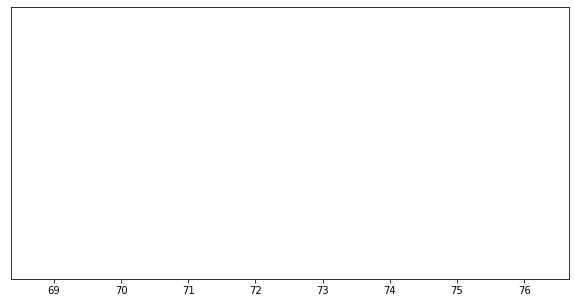

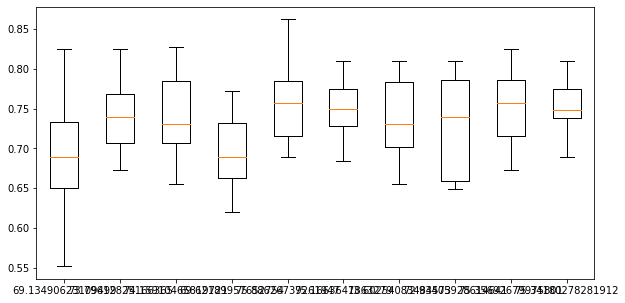

In [72]:

plt.figure(figsize=(10, 5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)

plt.show()

Mean accuracy of D_tree : 68.93 %
Mean accuracy of RF : 73.62 %
Mean accuracy of GNB : 75.69 %
Mean accuracy of KNN : 71.34 %
Mean accuracy of Ada : 75.70 %
Mean accuracy of QDA : 74.65 %
Mean accuracy of SVM_1 : 71.02 %
Mean accuracy of SVM_k : 73.25 %
Mean accuracy of Voting : 74.14 %
Mean accuracy of Bagging : 76.22 %


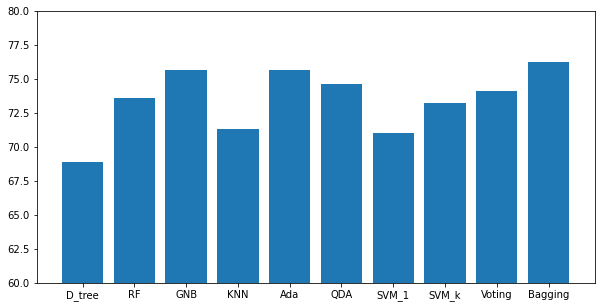

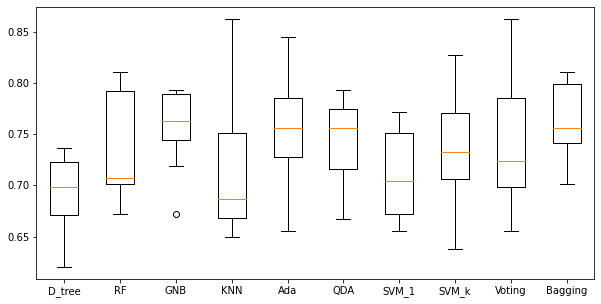

In [73]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators = [('1', AdaBoostClassifier()),
                                              ('2', RandomForestClassifier()),
                                              ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator= clf3, n_estimators = 10, random_state = 0)]

classifier_names = ['D_tree', 
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                    ]

modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits = 10, shuffle = True)
  accuracies = cross_val_score(classifier, X = X_train, y = y_train, cv = skf)

  print('Mean accuracy of', classifier_name, ': {:.2f} %'.format(accuracies.mean()* 100))

  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(10,5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)

plt.show()